In [187]:
import pandas as pd

In [188]:
data=pd.read_csv("/home/placement/Downloads/fiat500.csv")

In [189]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [190]:
data.head(5)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [211]:
data1=data.loc[(data.model=='lounge')]
data1

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
6,7,lounge,51,731,11600,1,44.907242,8.611560,10750
7,8,lounge,51,1521,49076,1,41.903221,12.495650,9190
11,12,lounge,51,366,17500,1,45.069679,7.704920,10990
...,...,...,...,...,...,...,...,...,...
1528,1529,lounge,51,2861,126000,1,43.841980,10.515310,5500
1529,1530,lounge,51,731,22551,1,38.122070,13.361120,9900
1530,1531,lounge,51,670,29000,1,45.764648,8.994500,10800
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600


In [212]:
data2=data1.drop(['ID','lat','lon'],axis=1)

In [213]:
data2

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
3,lounge,51,2739,160000,1,6000
6,lounge,51,731,11600,1,10750
7,lounge,51,1521,49076,1,9190
11,lounge,51,366,17500,1,10990
...,...,...,...,...,...,...
1528,lounge,51,2861,126000,1,5500
1529,lounge,51,731,22551,1,9900
1530,lounge,51,670,29000,1,10800
1534,lounge,74,3835,112000,1,4600


In [214]:
data3=pd.get_dummies(data2)

In [215]:
data3

,engine_power,age_in_days,km,previous_owners,price,model_lounge
0,51,882,25000,1,8900,1
3,51,2739,160000,1,6000,1
6,51,731,11600,1,10750,1
7,51,1521,49076,1,9190,1
11,51,366,17500,1,10990,1
...,...,...,...,...,...,...
1528,51,2861,126000,1,5500,1
1529,51,731,22551,1,9900,1
1530,51,670,29000,1,10800,1
1534,74,3835,112000,1,4600,1


In [216]:
data3.shape

(1094, 6)

In [217]:
y=data3['price']
x=data3.drop('price',axis=1)

In [218]:
x

,engine_power,age_in_days,km,previous_owners,model_lounge
0,51,882,25000,1,1
3,51,2739,160000,1,1
6,51,731,11600,1,1
7,51,1521,49076,1,1
11,51,366,17500,1,1
...,...,...,...,...,...
1528,51,2861,126000,1,1
1529,51,731,22551,1,1
1530,51,670,29000,1,1
1534,74,3835,112000,1,1


In [219]:
y

0        8900
3        6000
6       10750
7        9190
11      10990
        ...  
1528     5500
1529     9900
1530    10800
1534     4600
1536     5990
Name: price, Length: 1094, dtype: int64

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [221]:
x_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge
676,51,762,18609,1,1
215,51,701,25000,1,1
146,51,4018,152900,1,1
1319,51,731,20025,1,1
1041,51,640,38231,1,1


In [222]:
y_test.head(5)

676     10250
215      9790
146      5500
1319     9900
1041     8900
Name: price, dtype: int64

In [223]:
x_train.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge
441,51,762,36448,1,1
701,51,701,27100,1,1
695,51,3197,51083,1,1
1415,51,670,33000,1,1
404,51,456,14000,1,1


In [224]:
y_train.head(5)

441      8980
701     10300
695      5880
1415    10490
404      9499
Name: price, dtype: int64

In [225]:
import warnings
warnings.filterwarnings("ignore")

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [227]:
ridge_regressor.best_params_

{'alpha': 30}

In [228]:
ridge=Ridge(alpha=30)

In [229]:
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [230]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

519771.8129989745

In [231]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.8373030813683994

In [232]:
results=pd.DataFrame(columns=['actual','Predicted'])
results['actual']=y_test
results['Predicted']=y_pred_ridge
results=results.reset_index()
results['Id']=results.index
results.head(10)

,index,actual,Predicted,Id
0,676,10250,10045.347779,0
1,215,9790,9989.171535,1
2,146,5500,4769.099603,2
3,1319,9900,10048.683238,3
4,1041,8900,9813.944798,4
5,1425,9500,8678.143561,5
6,409,10450,10173.797921,6
7,617,9790,10180.627008,7
8,1526,9300,9107.315259,8
9,1010,4600,5625.007407,9


In [233]:
import seaborn as hh
import matplotlib.pyplot as plt

<Axes: xlabel='Id', ylabel='actual'>

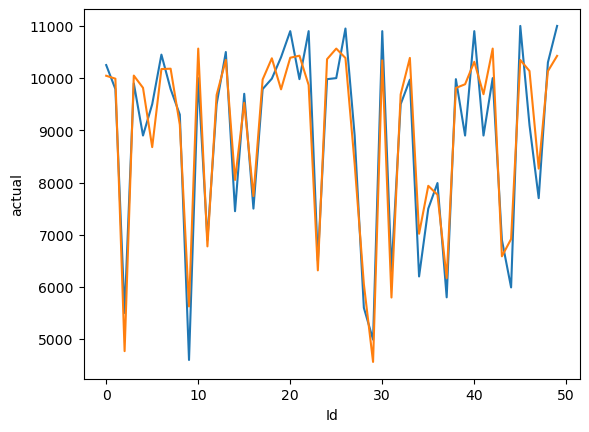

In [234]:
hh.lineplot(x='Id',y='actual',data=results.head(50))
hh.lineplot(x='Id',y='Predicted',data=results.head(50))